In [1]:
# import packages

# pandas for dataframe manipulation
import pandas as pd

# numerical python for some math needs
import numpy as np

# matplot lib and seaborn are graphical representation
import matplotlib.pyplot as plt
import seaborn as sns 

# stats model is more statistical modeling
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot

# sklearn packages for various modeling/ machine learning
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from dtreeviz.trees import dtreeviz


In [2]:
# load the cleaned data
NBA = pd.read_csv('NBA.csv')

In [3]:
# create the dependent variable, this wins column because we are trying to predict win totals
NBA_y = NBA['Wins']

In [4]:
# create the independent variable by removing the dependent variable and other description features
NBA_X = NBA.drop(columns=['Team', 'Wins','Season','Row ID'])

In [5]:
# split into a training and testing data sets.
# being sure to keep the test set away from the training data to not influence model development
X_train, X_test, y_train, y_test = train_test_split(NBA_X, NBA_y, test_size=0.2, random_state=15)

In [6]:
#standardize the data so they are all in the same format

#assign the standard scaler to a variable
scaler = preprocessing.StandardScaler()

#fit the scaler ON ONLY THE TRAINING SET
scaler.fit(X_train)

# process both the independent and dependent data through the standard scaler
# assigning them to new variables
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#first model selection is ridge. Ridge should work better than linearReg and Lasso due 
#to the colinearity of features

# I am using ridge cv so the alpha is optimized on it's own

#standardized
ridge_std = linear_model.RidgeCV()
model_ridge_std = ridge_std.fit(X_train_scaled, y_train)
ridge_coef = ridge_std.fit(X_train_scaled, y_train).coef_

In [8]:
# evaluating ridgeCV
y_predRIDGE = model_ridge_std.predict(X_test_scaled)
win_predict_ridge = y_predRIDGE-y_test

In [9]:
# this it the difference in win percent prediction and real wins for those teams
win_predict_ridge_abs = abs(win_predict_ridge)



In [10]:
# what are the worst predictions
win_predict_ridge_abs.nlargest(5)

48     0.250479
98     0.244949
97     0.235654
112    0.173281
74     0.166243
Name: Wins, dtype: float64

a few of these are really off.

#### The real wins are in 
y_test

##### Ridge1 predictions
y_predRIDGE

#### Difference in predictions
win_predict_ridge, win_predict_ridge_abs

In [11]:
# examining why results were so bad
NBA.iloc[48]

Season              2017-18
Row ID                   18
Team      Charlotte Hornets
Wins               0.439024
1 TS             23500000.0
1% TS             20.046377
1% SC             23.715096
2 TS             45934783.0
2% TS             39.184085
2% SC             46.355225
3 TS             59103533.0
3% TS              50.41752
3% SC             59.644509
4 TS             72103533.0
4% TS             61.507005
4% SC             72.763498
5 TS             84687803.0
5% TS             72.241857
5% SC             85.462952
6 TS             96687803.0
6% TS             82.478305
6% SC             97.572788
7 TS            103687803.0
7% TS             88.449567
7% SC            104.636859
8 TS            106592283.0
8% TS             90.927196
8% SC            107.567924
9 TS            109439883.0
9% TS             93.356306
9% SC            110.441588
10 TS           112139883.0
10% TS            95.659506
10% SC           113.166301
Name: 48, dtype: object

this prediction was .25 percent off. that is 20 wins. 

the 2017 charlotte hornets were the kemba walker non-max, dwight howard at 23m 
and nicholas batum at 22m. 

they were not good. they missed the playoffs. 

those players definitely did not play to the level of their contract. 
this model predicted 56 wins

y_pred 0.68950348 y_test 0.439024

In [12]:
NBA.iloc[74]

Season              2018-19
Row ID                   14
Team      Memphis Grizzlies
Wins               0.402439
1 TS             30521116.0
1% TS             24.440927
1% SC             29.961142
2 TS             54628374.0
2% TS             43.745717
2% SC             53.626102
3 TS             71167700.0
3% TS             56.990202
3% SC              69.86198
4 TS             83167700.0
4% TS             66.599652
4% SC             81.641814
5 TS             91808700.0
5% TS             73.519256
5% SC             90.124277
6 TS            100142033.0
6% TS             80.192485
6% SC             98.304718
7 TS            106057073.0
7% TS             84.929175
7% SC            104.111234
8 TS            110441689.0
8% TS             88.440321
8% SC            108.415405
9 TS            112978587.0
9% TS             90.471837
9% SC            110.905758
10 TS           115154847.0
10% TS            92.214558
10% SC            113.04209
Name: 74, dtype: object

Just an aging team that traded their players away<br>
I would not have guessed they would win 48 (0.5856) wins however I would have guessed... something like 44
this one is just wrong<br>
y_pred 0.58569071 y_test 0.40

In [13]:
NBA.iloc[112]

Season            2019-20
Row ID                 22
Team      Detroit Pistons
Wins                0.303
1 TS           34234964.0
1% TS           26.092286
1% SC           31.367935
2 TS           51521920.0
2% TS           39.267594
2% SC           47.207183
3 TS           67165670.0
3% TS           51.190528
3% SC           61.540837
4 TS           78558527.0
4% TS            59.87363
4% SC           71.979592
5 TS           88290923.0
5% TS           67.291206
5% SC           80.896942
6 TS           95624256.0
6% TS           72.880329
6% SC           87.616141
7 TS          102941329.0
7% TS           78.457059
7% SC           94.320441
8 TS          108273058.0
8% TS           82.520654
8% SC           99.205661
9 TS          112100218.0
9% TS           85.437536
9% SC          102.712313
10 TS         115669861.0
10% TS           88.15815
10% SC         105.983014
Name: 112, dtype: object

The 2019-20 Detroit Pistons. Not a good team. The highest salary on their books was a contract buy-out.

That is something to note for future model considerations

In [14]:
NBA.iloc[97]

Season               2019-20
Row ID                     7
Team      Los Angeles Lakers
Wins                   0.732
1 TS              37436858.0
1% TS                29.8459
1% SC              34.301684
2 TS              64529877.0
2% TS               51.44535
2% SC              59.125781
3 TS              79164023.0
3% TS              63.112174
3% SC              72.534381
4 TS              87253305.0
4% TS              69.561217
4% SC               79.94622
5 TS              92253305.0
5% TS              73.547382
5% SC              84.527492
6 TS              97020305.0
6% TS              77.347792
6% SC              88.895277
7 TS             101020305.0
7% TS              80.536724
7% SC              92.560294
8 TS             104520305.0
8% TS               83.32704
8% SC              95.767184
9 TS             107520305.0
9% TS              85.718739
9% SC              98.515947
10 TS            110270305.0
10% TS              87.91113
10% SC            101.035647
Name: 97, dtyp

this is the 2019-20 champion lakers 1 seed in the west.<br>
they went 52-19 in the pandemic shortened season<br>
salary stuff for this team. lebron makes 37m and anthony davis makes 27m<br>
this model really didn't like this team predicting sub .500. not sure why.

y_pred was 0.49634586 y_true was 0.732000

In [15]:
NBA.iloc[98]

Season                  2019-20
Row ID                        8
Team      Golden State Warriors
Wins                      0.231
1 TS                 40231758.0
1% TS                 30.587996
1% SC                 36.862523
2 TS                 72973758.0
2% TS                 55.481568
2% SC                 66.862523
3 TS                100478388.0
3% TS                 76.393195
3% SC                  92.06376
4 TS                119017518.0
4% TS                 90.488399
4% SC                109.050319
5 TS                123481804.0
5% TS                 93.882572
5% SC                 113.14074
6 TS                125446564.0
6% TS                 95.376369
6% SC                 114.94096
7 TS                126859836.0
7% TS                 96.450872
7% SC                116.235877
8 TS                127758146.0
8% TS                 97.133853
8% SC                117.058957
9 TS                128656456.0
9% TS                 97.816833
9% SC                117.882038
10 TS   

The pandemic season warriors were super injured. <br>
Stephen curry 40m injured klay thompson 32m injured full season<br>
y_pred 0.47594878 y_test 0.231000<br>
This is the kind of model breaking team/season

In [16]:
# average of 8.2 wins off real.. 25% 3.9 wins off.. 50% 5.86 wins off
# I would be happy with an average of 4 wins
# correction! I checked some vegas odds for win predictions against outcomes
# vegas was off by 5.3 wins for the 2020-21 season that is the mark to beat.

abs_win = abs(win_predict_ridge)
abs_win.describe()

count    30.000000
mean      0.091774
std       0.070588
min       0.002999
25%       0.047668
50%       0.071564
75%       0.137575
max       0.250479
Name: Wins, dtype: float64

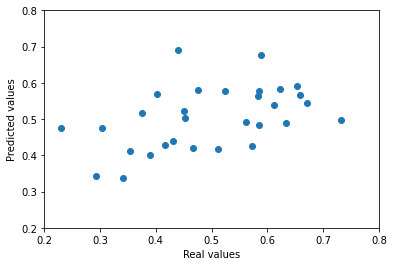

In [17]:
# plotting ridge predictions against real
plt.scatter(y_test, y_predRIDGE)
plt.ylabel('Predicted values')
plt.xlabel('Real values')
plt.xticks(np.arange(0.2,0.8,0.1))
plt.yticks(np.arange(0.2,0.8,0.1))
plt.show()

In [18]:
#let's test lasso
names = NBA.drop(['Team', 'Wins','Season','Row ID'], axis=1).columns
lasso = linear_model.LassoCV(max_iter=200000)
model_lasso = lasso.fit(X_train_scaled, y_train)
lasso_coef = lasso.fit(X_train_scaled, y_train).coef_
model_lasso.score(X_train_scaled, y_train)

0.25389945197408603

In [19]:
model_lasso.alpha_

0.009959047821398805

In [20]:
#like expected lasso has a worse r2
y_pred_lasso = model_lasso.predict(X_test_scaled)
win_predict_lasso = y_pred_lasso-y_test
win_predict_lasso_abs = abs(win_predict_lasso)

#### The real wins are in 
y_test
##### Ridge1 predictions
y_pred_lasso

#### Difference in predictions
win_predict_lasso, win_predict_lasso_abs


In [21]:
# lasso is better. I now the average is worse however the worst prediction, the super injured warriors 
# went up to 0.39 off from 0.25
win_predict_lasso_abs.describe()

count    30.000000
mean      0.094549
std       0.079425
min       0.005150
25%       0.041987
50%       0.067026
75%       0.128896
max       0.397170
Name: Wins, dtype: float64

In [22]:
# worst lasso
win_predict_lasso.nlargest(5)

98     0.397170
112    0.187322
148    0.168414
74     0.140257
5      0.131896
Name: Wins, dtype: float64

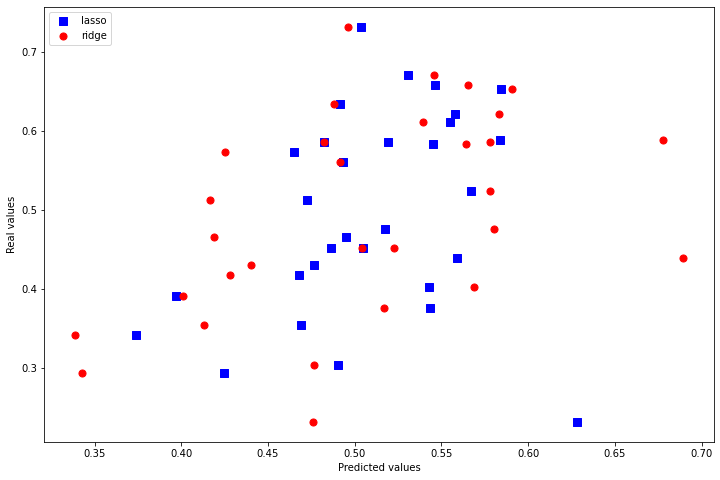

In [23]:
# comparing both models
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot()

ax1.scatter(y_pred_lasso, y_test, s=50, c='b', marker="s", label='lasso')
ax1.scatter(y_predRIDGE, y_test, s=50, c='r', marker="o", label='ridge')
plt.legend(loc='upper left')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.show()

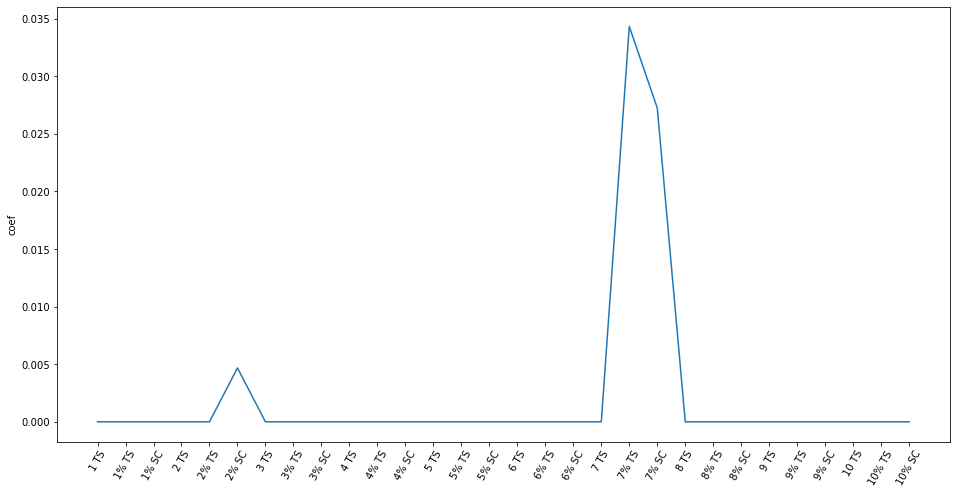

In [24]:
# lasso will tell you the most influential variables
_ = plt.figure(figsize=(16,8))
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('coef')
plt.show()

7 players percent of total salary, 7 players % salary cap, and 2 players Salary cap

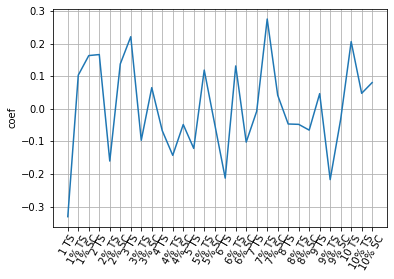

In [25]:
# let's see how the ridge proformed the weighting of features
_ = plt.plot(range(len(names)), ridge_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('coef')
_ = plt.grid()
plt.show()

the favorite variable was also 7% total salary, however preferred 3 player total salary second and 10 Total salary

In [26]:
# Linear Regression model
lr = linear_model.LinearRegression()

In [27]:
# again fit to standard scaler

lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train)

0.5201432823399867

This is a better r2 better than ridge cv

In [28]:
# generating linear regression predictions
LR_y_pred = lr.predict(X_test_scaled)

# difference between predictions and reality
linear_pred = LR_y_pred-y_test

# checking results
LR_win_abs = abs(linear_pred)

The worst predictions came from 148, 48, 97, 74, 100
We already know who 48 (charlotte hornets) and 97 (injured warriors)

In [29]:
# who is 148. The pandemic 2020-21 Toronto raptors! this team played home games in tampa, Fl
# so they wouldn't have to cross the border all the time. 
# y_pred 0.62034152  y_test 0.375
NBA.iloc[148]

Season            2020-21
Row ID                 28
Team      Toronto Raptors
Wins                0.375
1 TS           30559200.0
1% TS           23.905854
1% SC                28.0
2 TS           61059200.0
2% TS           47.765397
2% SC           55.945758
3 TS           82309200.0
3% TS            64.38885
3% SC           75.416163
4 TS           92356650.0
4% TS            72.24877
4% SC           84.622183
5 TS           99356650.0
5% TS            77.72473
5% SC           91.035963
6 TS          105856650.0
6% TS           82.809551
6% SC           96.991616
7 TS          109856650.0
7% TS           85.938672
7% SC          100.656634
8 TS          113728865.0
8% TS           88.967828
8% SC          104.204568
9 TS          117533015.0
9% TS           91.943739
9% SC          107.690137
10 TS         119791015.0
10% TS          93.710128
10% SC         109.759039
Name: 148, dtype: object

In [30]:
#Luka's Rookie season! ya this team definitely out performed their estimates
# y_pred 0.39217341 (32 wins) y_test 0.573 (46 wins)
NBA.iloc[100]

Season             2019-20
Row ID                  10
Team      Dallas Mavericks
Wins                 0.573
1 TS            27285000.0
1% TS             22.34829
1% SC                 25.0
2 TS            45435000.0
2% TS            37.214388
2% SC            41.630016
3 TS            58194670.0
3% TS            47.665435
3% SC             53.32112
4 TS            68454045.0
4% TS            56.068568
4% SC            62.721317
5 TS            77927729.0
5% TS            63.828166
5% SC            71.401621
6 TS            85927729.0
6% TS            70.380716
6% SC            78.731656
7 TS            93611089.0
7% TS            76.673916
7% SC            85.771568
8 TS           101072469.0
8% TS            82.785299
8% SC             92.60809
9 TS           105072469.0
9% TS            86.061574
9% SC            96.273107
10 TS          108572469.0
10% TS           88.928315
10% SC           99.479997
Name: 100, dtype: object

In [31]:
# let's explore how close it is
# average of 8.2 wins off real.. 25% 4.8 wins off.. 50% 6.89 wins off
# this was slightly worse.  this makes sense. Linear Regression is ridge regression was alpha = 0 

LR_win_abs.describe()

count    30.000000
mean      0.101100
std       0.066832
min       0.001786
25%       0.058680
50%       0.084225
75%       0.150300
max       0.245342
Name: Wins, dtype: float64

In [32]:
# mean squared error for ridge cv
mean_squared_error(y_test, y_predRIDGE)

0.013239120843559339

In [33]:
# mean squared error for linear regression
mean_squared_error(y_test, LR_y_pred)

0.014538732733911519

The mean squared error is consistant that ridge was better than linear Reg

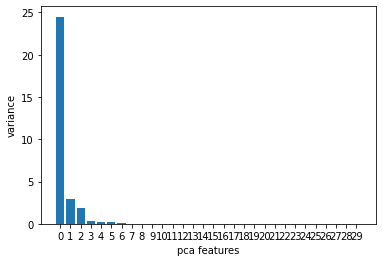

In [34]:
# checking some decomp
pca = PCA()
pca.fit(X_train_scaled)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('pca features')
plt.show()

In [35]:
#this agrees with lasso that only 3 features are meaningful; 
#get 2 great players and then also spend most of your money on the top 7

In [36]:
# before I head over to the next type of model
# let's see if we can make ridgecv even better.  Ridge cv does automate some hyperparameter tuning already.

# new ridge default scoring is neg_mean_absolute_error
ridge_2 = linear_model.RidgeCV(alphas = np.arange(0.5, 10, 0.1), scoring='r2') 
model_ridge_2 = ridge_2.fit(X_train_scaled, y_train)
ridge_2_coef = ridge_std.fit(X_train_scaled, y_train).coef_

print("what's my alpha! : ", model_ridge_2.alpha_)

what's my alpha! :  2.4999999999999996


In [37]:
#check how it is doing with the new BIG alpha 

y_predRIDGE_2 = model_ridge_2.predict(X_test_scaled)
win_predict_ridge_2 = y_predRIDGE_2-y_test
win_predict_ridge_2 = abs(win_predict_ridge_2)
win_predict_ridge_2

6      0.035796
61     0.104738
90     0.072953
30     0.108227
31     0.078985
55     0.109768
109    0.016494
98     0.289683
59     0.127753
103    0.025886
126    0.059496
97     0.233223
74     0.163378
67     0.061959
115    0.042112
25     0.023222
95     0.031110
100    0.125315
9      0.023914
129    0.042379
71     0.039865
47     0.062209
86     0.060020
57     0.071577
48     0.198035
5      0.082451
112    0.173172
148    0.139512
122    0.011773
78     0.083526
Name: Wins, dtype: float64

In [38]:
# r2 is worse...
model_ridge_2.score(X_train_scaled, y_train)

0.33561057752207635

In [39]:
# but predictions are better on average
win_predict_ridge_2.describe(), abs_win.describe()

(count    30.000000
 mean      0.089951
 std       0.067620
 min       0.011773
 25%       0.040427
 50%       0.072265
 75%       0.121428
 max       0.289683
 Name: Wins, dtype: float64,
 count    30.000000
 mean      0.091774
 std       0.070588
 min       0.002999
 25%       0.047668
 50%       0.071564
 75%       0.137575
 max       0.250479
 Name: Wins, dtype: float64)

the ridge model really likes an alpha near zero. however if you remove that as an option alpha = 2.5 gets better predictions

In [40]:
#let's test lasso with newer alphas

lasso_2 = linear_model.LassoCV(max_iter=200000, alphas=np.arange(0.001,3,0.001))
model_lasso_2 = lasso_2.fit(X_train_scaled, y_train)
lasso_coef_2 = lasso_2.fit(X_train_scaled, y_train).coef_
model_lasso_2.score(X_train_scaled, y_train)


0.2538542355410863

That is a nicer score

In [41]:
model_lasso_2.alpha_

0.010000000000000002

In [42]:
y_pred_lasso_2 = model_lasso_2.predict(X_test_scaled)
win_predict_lasso_2 = y_pred_lasso_2-y_test
win_predict_lasso_2 = abs(win_predict_lasso_2)
win_predict_lasso_2

6      0.064097
61     0.112199
90     0.055972
30     0.102904
31     0.067843
55     0.142587
109    0.034131
98     0.397082
59     0.139977
103    0.050742
126    0.068366
97     0.228586
74     0.140230
67     0.053805
115    0.005211
25     0.032369
95     0.028727
100    0.108098
9      0.006608
129    0.045866
71     0.066212
47     0.042899
86     0.039431
57     0.115366
48     0.119869
5      0.131959
112    0.187329
148    0.168383
122    0.038288
78     0.041676
Name: Wins, dtype: float64

In [43]:
## lasso                           ridge_2                         ridge 1
win_predict_lasso_2.describe(), win_predict_ridge_2.describe(), abs_win.describe()

(count    30.000000
 mean      0.094560
 std       0.079404
 min       0.005211
 25%       0.041982
 50%       0.067028
 75%       0.128937
 max       0.397082
 Name: Wins, dtype: float64,
 count    30.000000
 mean      0.089951
 std       0.067620
 min       0.011773
 25%       0.040427
 50%       0.072265
 75%       0.121428
 max       0.289683
 Name: Wins, dtype: float64,
 count    30.000000
 mean      0.091774
 std       0.070588
 min       0.002999
 25%       0.047668
 50%       0.071564
 75%       0.137575
 max       0.250479
 Name: Wins, dtype: float64)

In [44]:
np.max(win_predict_lasso_2)

0.39708215677482384

In [45]:
y_pred_lasso_2

array([0.5578544 , 0.54633777, 0.5550283 , 0.48246188, 0.49313227,
       0.49155972, 0.48613084, 0.62808216, 0.53075448, 0.46774205,
       0.58441156, 0.50341377, 0.5426693 , 0.50502441, 0.58378924,
       0.3738328 , 0.49472724, 0.46490177, 0.39685231, 0.47642177,
       0.51915404, 0.56728959, 0.47276363, 0.46902411, 0.55889299,
       0.42464226, 0.49032925, 0.54338262, 0.54504559, 0.51728553])

In [46]:
# total difference, removing the worst prediction, then calculating the new average difference
print("lasso 2 : ",(np.sum(win_predict_lasso_2)-np.max(win_predict_lasso_2))/29,
      "lasso 1 : ",(np.sum(win_predict_lasso_abs)-np.max(win_predict_lasso))/29,
      "ridge 2 : ",(np.sum(win_predict_ridge_2)-np.max(win_predict_ridge_2))/29,
      "ridge 1 : ",(np.sum(abs_win)-np.max(abs_win))/29)

lasso 2 :  0.08412864840923187 lasso 1 :  0.084114142870175 ridge 2 :  0.08306368164002352 ridge 1 :  0.08630153407661736


That is close. ridge 2 eeks out a win against lasso 1. At the moment I still like lasso 1. The lasso predictions better reflect my feelings about what COULD have happened. 


In [47]:
# running a random forest regressor, or ensemble method. 

# I have selected absolute error because I am less worried about large error.
# I am comparing to vegas predictions and if you lose a bet you lose a bet. The degree of how bad is irrelevant

RandomForestReg = RandomForestRegressor(n_estimators=1000, criterion='absolute_error',max_depth = 2, random_state = 55)
RFR_model = RandomForestReg.fit(X_train_scaled,y_train)
RFR_pred = RFR_model.predict(X_test_scaled)
RFR_model.score(X_train_scaled,y_train)


0.47218007891960534

That is a much better r2

In [48]:
# determining how close predictions are
WP_RandomForestR = RFR_pred-y_test
WP_RandomForestR = abs(WP_RandomForestR)
WP_RandomForestR

6      0.118865
61     0.061074
90     0.027547
30     0.106168
31     0.016908
55     0.157979
109    0.018415
98     0.409370
59     0.066525
103    0.059644
126    0.018813
97     0.200015
74     0.177975
67     0.082443
115    0.003796
25     0.016159
95     0.013139
100    0.102901
9      0.030360
129    0.002351
71     0.054924
47     0.010463
86     0.077668
57     0.108362
48     0.079056
5      0.061397
112    0.216851
148    0.232004
122    0.009729
78     0.020115
Name: Wins, dtype: float64

In [49]:
# better average with a high max
WP_RandomForestR.describe()

count    30.000000
mean      0.085367
std       0.090111
min       0.002351
25%       0.018515
50%       0.061236
75%       0.107814
max       0.409370
Name: Wins, dtype: float64

In [50]:
# total difference, removing the worst prediction, then calculating the new average difference
print("lasso 1 : ",(np.sum(win_predict_lasso_abs)-np.max(win_predict_lasso))/29,
      "ridge 2 : ",(np.sum(win_predict_ridge_2)-np.max(win_predict_ridge_2))/29,
      "RandomF 1 : ",(np.sum(WP_RandomForestR)-np.max(WP_RandomForestR))/29)

lasso 1 :  0.084114142870175 ridge 2 :  0.08306368164002352 RandomF 1 :  0.07419469381366231


In [51]:
# New Leader 6 wins off on average. 


In [52]:
future = pd.read_csv('future.csv')
future_X = future.drop(columns=['Team', 'Wins','Season','Unnamed: 0'])

In [53]:
future

,Unnamed: 0,Season,Team,Wins,1 TS,1% TS,1% SC,2 TS,2% TS,2% SC,...,7% SC,8 TS,8% TS,8% SC,9 TS,9% TS,9% SC,10 TS,10% TS,10% SC
0,0,2021-22,Portland Trailblazers,NaN,39344900.0,27.354576,35.000000,70209098.0,48.812936,62.455831,...,111.491040,128175967.0,89.114452,114.021356,130565608.0,90.775852,116.147106,132955249.0,92.437252,118.272857
1,1,2021-22,Utah Jazz,NaN,35344828.0,22.846263,31.441660,63448378.0,41.011894,56.441705,...,122.980188,144136949.0,93.167540,128.219749,146538486.0,94.719850,130.356082,148614366.0,96.061662,132.202720
2,2,2021-22,Minnesota Timberwolves,NaN,31610000.0,22.976059,28.119273,61623500.0,44.791685,54.818350,...,106.658319,123986787.0,90.121091,110.294792,127926971.0,92.985055,113.799857,130280291.0,94.695591,115.893297
3,3,2021-22,Denver Nuggets,NaN,31590000.0,23.037546,28.101482,62100423.0,45.287792,55.242606,...,102.993293,120278880.0,87.715424,106.996353,124083030.0,90.489665,110.380406,126581790.0,92.311928,112.603226
4,4,2021-22,Oklahoma City Thunder,NaN,26238422.0,33.561596,23.340885,35959322.0,45.995610,31.988295,...,51.351268,60627254.0,77.548390,53.932121,63140294.0,80.762823,56.167643,65553134.0,83.849089,58.314030
5,5,2021-22,Cleveland Cavaliers,NaN,31300000.0,23.042654,27.843507,51300000.0,37.766394,45.634885,...,96.043618,114687193.0,84.431222,102.022162,121036864.0,89.105768,107.670632,123678555.0,91.050546,110.020598
6,6,2021-22,Indiana Pacers,NaN,21700000.0,16.192361,19.303645,40262500.0,30.043545,35.816268,...,94.696835,112458920.0,83.915918,100.039959,117336969.0,87.555877,104.379320,121086489.0,90.353738,107.714777
7,7,2021-22,Phoenix Suns,NaN,31610000.0,24.350241,28.119273,62410000.0,48.076512,55.517996,...,94.135584,110821575.0,85.369569,98.583428,115279575.0,88.803716,102.549126,119716575.0,92.221686,106.496144
8,8,2021-22,Golden State Warriors,NaN,45780966.0,25.684682,40.725324,83761686.0,46.993161,74.511792,...,141.601153,162741600.0,91.303585,144.769869,165383291.0,92.785664,147.119835,167772932.0,94.126334,149.245585
9,9,2021-22,Los Angeles Lakers,NaN,44211146.0,26.982541,39.328861,85391690.0,52.115472,75.961793,...,127.105824,145526432.0,88.816356,129.455790,148168123.0,90.428608,131.805756,150809814.0,92.040861,134.155723


In [54]:
# scale the future
future_X_scaled = scaler.transform(future_X)

In [55]:
# predict the current season based on the best model
future_pred = RFR_model.predict(future_X_scaled)
future_pred.max()

0.6450535379403786

In [56]:
print("""The 1 seed prediction is :

""", future_pred.max()*82,"""

""",
      future.loc[future_pred.argmax(),:])

The 1 seed prediction is :

 52.89439011111104 

 Unnamed: 0                        8
Season                      2021-22
Team          Golden State Warriors
Wins                            NaN
1 TS                     45780966.0
1% TS                     25.684682
1% SC                     40.725324
2 TS                     83761686.0
2% TS                     46.993161
2% SC                     74.511792
3 TS                    115341076.0
3% TS                     64.710275
3% SC                    102.603836
4 TS                    139367788.0
4% TS                      78.19008
4% SC                    123.977252
5 TS                    148534588.0
5% TS                     83.332967
5% SC                    132.131752
6 TS                    154000948.0
6% TS                     86.399781
6% SC                    136.994456
7 TS                    159179520.0
7% TS                     89.305137
7% SC                    141.601153
8 TS                    162741600.0
8% TS         

In [57]:
future_pred

array([0.59067538, 0.62697218, 0.60174037, 0.5853733 , 0.3429764 ,
       0.55530722, 0.4840341 , 0.56410175, 0.64505354, 0.60397191,
       0.59956636, 0.47888868, 0.4640422 , 0.55145575, 0.35907792,
       0.47450373, 0.53366022, 0.56827072, 0.3747888 , 0.64450047,
       0.46392269, 0.40107967, 0.58452482, 0.40894179, 0.49836744,
       0.64189595, 0.5880828 , 0.40613384, 0.59230225, 0.49872396])

In [58]:
# let's see the complete results
future['RANDOM Prediction'] = future_pred

#order by wins
future = future.sort_values(by=['RANDOM Prediction'], ascending=False)
future_teams = future[['Team','RANDOM Prediction']]

#do some adjusting
future_teams = future_teams.reset_index()
future_teams.index = future_teams.index +1

#show me the results
future_teams = future_teams.drop(columns='index')
future_teams



,Team,RANDOM Prediction
1,Golden State Warriors,0.645054
2,Miami Heat,0.644500
3,Philadelphia Sixers,0.641896
4,Utah Jazz,0.626972
5,Los Angeles Lakers,0.603972
6,Minnesota Timberwolves,0.601740
7,Los Angeles Clippers,0.599566
8,Toronto Raptors,0.592302
9,Portland Trailblazers,0.590675
10,Brooklyn Nets,0.588083


In [59]:
future_up = future_teams.copy(deep=True)

<Figure size 1728x1728 with 0 Axes>

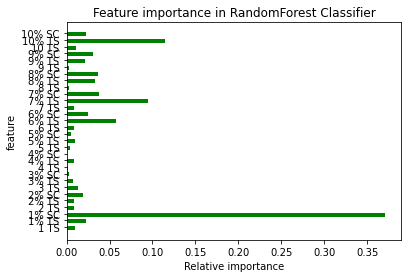

In [60]:

#modelname.feature_importance_
y = RFR_model.feature_importances_
plt.figure(figsize=(24,24))
#plot
fig, ax = plt.subplots() 
width = 0.6 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/5)
ax.set_yticklabels(NBA_X, minor=False, fontsize=10)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.savefig('bars_tree.png')
plt.show()


[Text(223.2, 362.4, '8% SC <= 0.268\nabsolute_error = 0.121\nsamples = 77\nvalue = 0.556'),
 Text(111.6, 217.44, '7% SC <= -1.049\nabsolute_error = 0.107\nsamples = 44\nvalue = 0.458'),
 Text(55.8, 72.47999999999996, 'absolute_error = 0.065\nsamples = 12\nvalue = 0.318'),
 Text(167.39999999999998, 72.47999999999996, 'absolute_error = 0.092\nsamples = 32\nvalue = 0.5'),
 Text(334.79999999999995, 217.44, '6% TS <= 1.02\nabsolute_error = 0.073\nsamples = 33\nvalue = 0.622'),
 Text(279.0, 72.47999999999996, 'absolute_error = 0.067\nsamples = 19\nvalue = 0.583'),
 Text(390.59999999999997, 72.47999999999996, 'absolute_error = 0.043\nsamples = 14\nvalue = 0.701')]

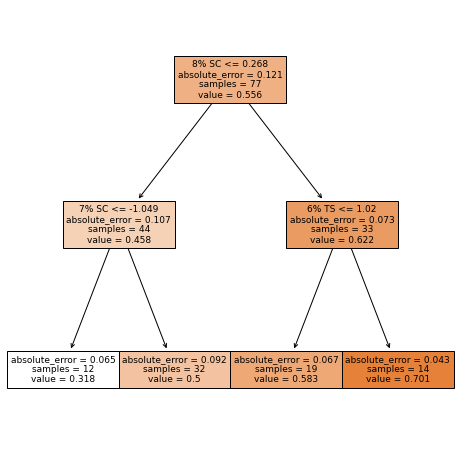

In [61]:
plt.figure(figsize=(8,8))
_ = tree.plot_tree(RFR_model.estimators_[15], feature_names=NBA_X.columns, filled=True)
plt.savefig('tree.png')
_

In [66]:

viz = dtreeviz(RFR_model.estimators_[15], X_train_scaled, y_train, feature_names=NBA_X.columns, target_name="Wins")
viz.write_png("fancytree.png")


AttributeError: 'DTreeViz' object has no attribute 'write_png'

NameError: name 'y_test_list' is not defined

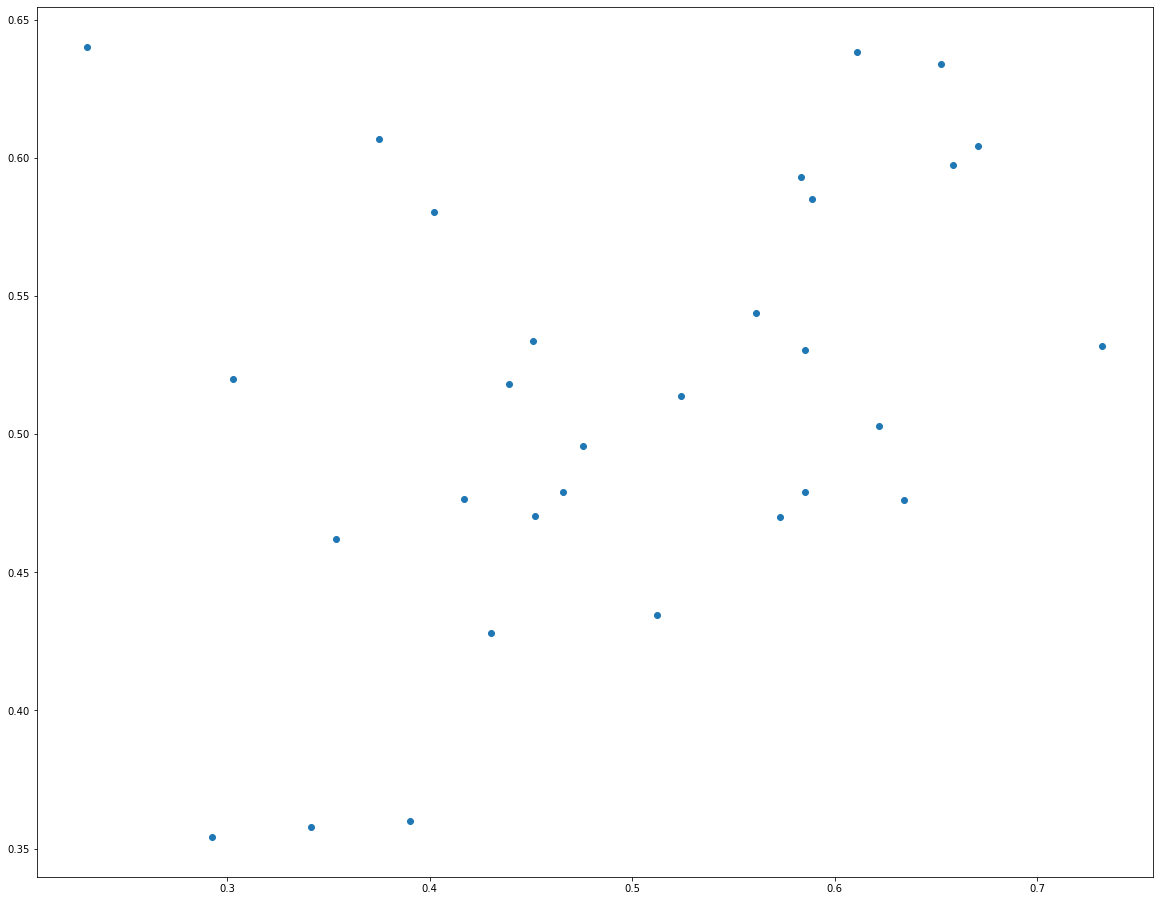

In [63]:
# plotting forest predictions against real
plt.figure(figsize=(20,16))
plt.scatter(y_test, RFR_pred)
for i in range(len(y_test)):
        plt.annotate(NBA['Team'][y_test_list[i]], (y_test[y_test_list[i]], RFR_pred[i]))
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.xticks(np.arange(0.2,0.8,0.1))
plt.yticks(np.arange(0.2,0.8,0.1))
plt.savefig('scatter_RFR.png')
plt.show()